In [2]:
import zeep
import pandas as pd

def getData(par_dict={"KSRQ": "2018-02-26", "JSRQ": "2018-02-26", "YYB": "1", "TJFL": "0"},
            lookout_str='cxSqlKHCJTJ_GPXZ'):
    wsdl = 'http://10.21.2.75:8080/service/LBEBusiness?wsdl'
    client = zeep.Client(wsdl=wsdl)
    # ns0:loginResult(message: xsd:string, result: xsd:int, sessionId: xsd:string)
    sessionId = client.service.login("ZXQH_GPXZ", "GPXZ123321", "myapp", "plain", "")
    print(client.service.login("ZXQH_GPXZ", "GPXZ123321", "myapp", "plain", ""))
    factory = client.type_factory('ns0')
    string_type = client.get_type('xsd:string')
    lbParameter_type = client.get_type('ns0:lbParameter')
    queryOption_type = client.get_type('ns0:queryOption')
    '''		tmap.put("KSRQ", "2018-02-26");
    		tmap.put("JSRQ", "2018-02-26");
    		tmap.put("YYB", "1");
    		tmap.put("TJFL", "0");'''
    # par_dict = {"KSRQ": "2018-02-26", "JSRQ": "2018-02-26", "YYB": "1", "TJFL": "0"}
    params = []
    for key in par_dict:
        val = par_dict[key]
        temp_lbParameter = lbParameter_type(name=key, value=val)
        params.append(temp_lbParameter)

    valueOption_type = client.get_type('ns0:valueOption')
    valueOption = valueOption_type('VALUE')
    batchNo = 1
    batchSize = 3000
    ans_records = []
    mqueryOption = queryOption_type(batchNo=batchNo, batchSize=batchSize, queryCount=True, valueOption=valueOption)

    ans = client.service.query(sessionId.sessionId, lookout_str, params, "", mqueryOption)
    ans_records.extend(ans.records)
   
    while ((ans.result > 0) & ans.hasMore):
        batchNo += 1
        print('batchNo:{batchNo}'.format(batchNo=batchNo))

        mqueryOption = queryOption_type(batchNo=batchNo, batchSize=batchSize, queryCount=True, valueOption=valueOption)
        ans = client.service.query(sessionId.sessionId, lookout_str, params, "", mqueryOption)
        ans_records.extend(ans.records)
        # print(ans)
        print('batchNo:{batchNo}'.format(batchNo=batchNo))

    print(client.service.logout(sessionId.sessionId))
    return ans_records

   

    




   

{
    'message': '成功',
    'result': 1,
    'sessionId': '2140eb7ad6433a97f4094506475e9cf3'
}


{
    'message': '成功',
    'result': 1
}
[{
    'size': 3,
    'values': [
        '公司',
        '20180102',
        '725225'
    ]
}, {
    'size': 3,
    'values': [
        '市场',
        '20180102',
        '16984802'
    ]
}, {
    'size': 3,
    'values': [
        '公司',
        '20180103',
        '659143'
    ]
}, {
    'size': 3,
    'values': [
        '市场',
        '20180103',
        '17067059'
    ]
}, {
    'size': 3,
    'values': [
        '公司',
        '20180104',
        '760929'
    ]
}, {
    'size': 3,
    'values': [
        '市场',
        '20180104',
        '19994012'
    ]
}, {
    'size': 3,
    'values': [
        '市场',
        '20180105',
        '20261996'
    ]
}, {
    'size': 3,
    'values': [
        '公司',
        '20180105',
        '757809'
    ]
}, {
    'size': 3,
    'values': [
        '市场',
        '20180108',
        '20317680'
    ]
}, {
    'size': 3,
    'values': [
        '公司',
        '20180108',
        '803234'
    ]
}, {
    'size': 3,
 

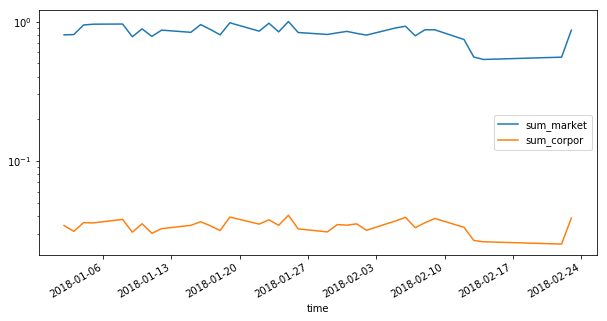

In [6]:
# par_dict = {"KSRQ": "2018-01-01", "JSRQ": "2018-02-23", "ZB": "0", "ZQ": "0"}
par_dict = {"KSRQ": "2018-01-01", "JSRQ": "2018-02-23", "ZB": "0", "ZQ": "0", "TJFL":"0"}
lookout_str = 'SqlGPXZGSSCQS'
    



records = getData(par_dict, lookout_str)
print(records)
clean_records = []
for a_record in records:
    clean_records.append(a_record.values)
df = pd.DataFrame(clean_records,columns=['trade_type', 'time', 'sum',])
print(df.head())
df['time'] = pd.to_datetime(df['time'])
df['sum'] = df['sum'].astype(float)
df['sum'] = df['sum']  / df['sum'].max()
# df['sum'] = (df['sum'] * 100) / df['sum'].max

    
df_market = df[df['trade_type'] == '市场']
df_corpor = df[df['trade_type'] != '市场']
    
join_df = df_market.set_index('time').join(df_corpor.set_index('time'),lsuffix='_market', rsuffix='_corpor')
print(join_df['sum_market'])
print()
# join_df.plot(subplots=True, figsize=(10, 5));
join_df.plot(subplots=False, figsize=(10, 5), logy=True)

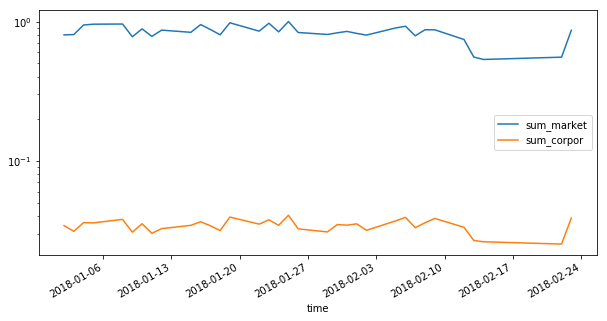

In [8]:
join_df.plot(subplots=False, figsize=(10, 5), loglog=True)

[Text(0,0,'-300.00%'),
 Text(0,0,'-200.00%'),
 Text(0,0,'-100.00%'),
 Text(0,0,'0.00%'),
 Text(0,0,'100.00%'),
 Text(0,0,'200.00%'),
 Text(0,0,'300.00%'),
 Text(0,0,'400.00%')]

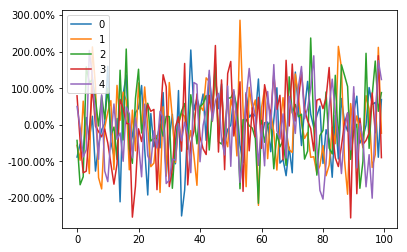

In [9]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(100,5))
# print(df)
# you get ax from here
ax = df.plot()
type(ax)  # matplotlib.axes._subplots.AxesSubplot

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

[Text(0,0,'0.10%'),
 Text(0,0,'1.00%'),
 Text(0,0,'10.00%'),
 Text(0,0,'100.00%'),
 Text(0,0,'1000.00%'),
 Text(0,0,'10000.00%')]

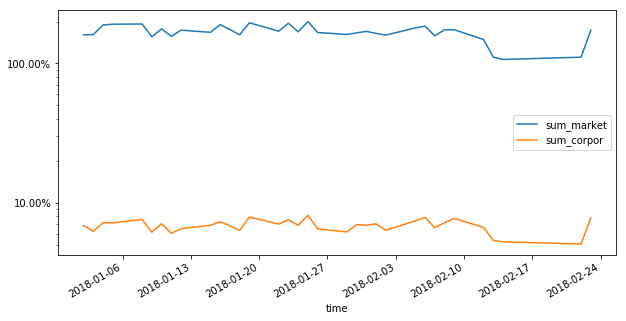

In [7]:
ax = join_df.plot(subplots=False, figsize=(10, 5), loglog=True)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

In [10]:
join_df

,trade_type_market,sum_market,trade_type_corpor,sum_corpor
time,,,,
2018-01-02,市场,0.802164,公司,0.034251
2018-01-03,市场,0.806049,公司,0.031130
2018-01-04,市场,0.944284,公司,0.035937
2018-01-05,市场,0.956941,公司,0.035790
2018-01-08,市场,0.959571,公司,0.037935
2018-01-09,市场,0.777493,公司,0.030706
2018-01-10,市场,0.885791,公司,0.035285
2018-01-11,市场,0.782073,公司,0.030140
2018-01-12,市场,0.867410,公司,0.032549


In [11]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

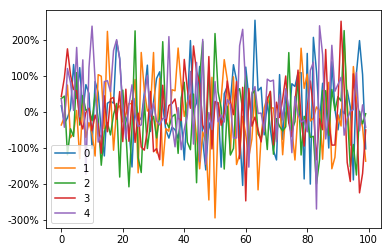

In [10]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

df = pd.DataFrame(np.random.randn(100,5))

ax = df.plot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

[Text(0,0,'0.10%'),
 Text(0,0,'1.00%'),
 Text(0,0,'10.00%'),
 Text(0,0,'100.00%'),
 Text(0,0,'1000.00%'),
 Text(0,0,'10000.00%')]

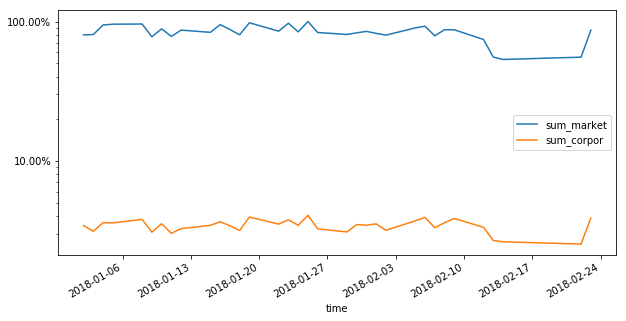

In [12]:
ax = join_df.plot(subplots=False, figsize=(10, 5), logy=True)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

In [13]:
print(join_df)

           trade_type_market  sum_market trade_type_corpor  sum_corpor
time                                                                  
2018-01-02                市场    0.802164                公司    0.034251
2018-01-03                市场    0.806049                公司    0.031130
2018-01-04                市场    0.944284                公司    0.035937
2018-01-05                市场    0.956941                公司    0.035790
2018-01-08                市场    0.959571                公司    0.037935
2018-01-09                市场    0.777493                公司    0.030706
2018-01-10                市场    0.885791                公司    0.035285
2018-01-11                市场    0.782073                公司    0.030140
2018-01-12                市场    0.867410                公司    0.032549
2018-01-15                市场    0.836640                公司    0.034376
2018-01-16                市场    0.950734                公司    0.036480
2018-01-17                市场    0.876482                公司    0.034135
2018-0

[Text(1,0,'0.10%'),
 Text(1,0,'1.00%'),
 Text(1,0,'10.00%'),
 Text(1,0,'100.00%'),
 Text(1,0,'1000.00%'),
 Text(1,0,'10000.00%')]

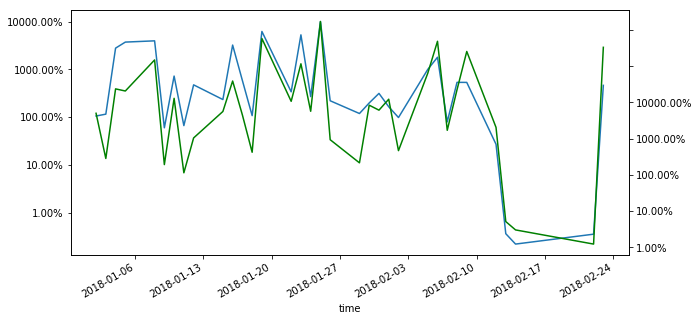

In [13]:
import matplotlib.pyplot as plt
plt.figure()
ax1 = join_df.sum_market.plot(figsize=(10, 5))
ax2 =join_df.sum_corpor.plot(secondary_y=True, style='g',figsize=(10, 5))
ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

In [14]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df.plot(legend=False)

NameError: name 'ts' is not defined

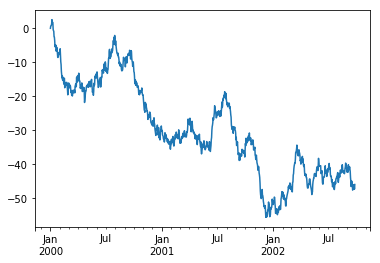

In [15]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

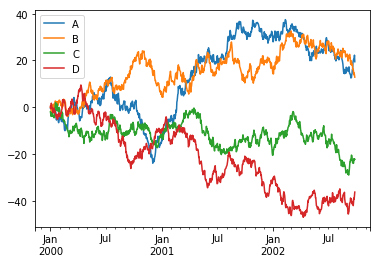

In [16]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot();

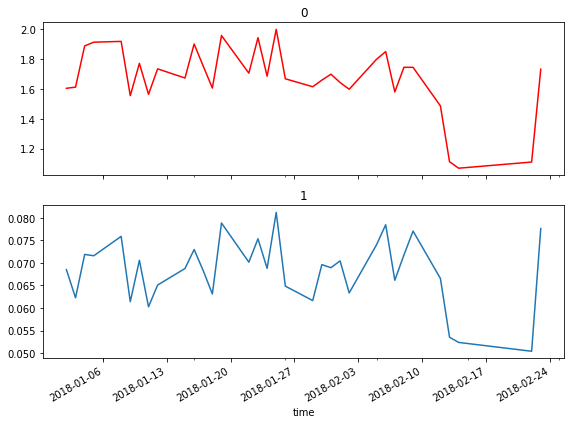

In [17]:
import matplotlib.pyplot as plt
# plt.figure()
# ax1 = join_df.sum_market.plot(figsize=(10, 5))
# ax2 =join_df.sum_corpor.plot(secondary_y=True, style='g',figsize=(10, 5))
# ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
# ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig, axes = plt.subplots(nrows=2, ncols=1, sharex = True)
fig.set_figheight(6)
fig.set_figwidth(8)
join_df.sum_market.plot(ax=axes[0], style='r', label='Series')
axes[0].set_title(0)

join_df.sum_corpor.plot(ax=axes[1], )
axes[1].set_title(1)

fig.tight_layout()

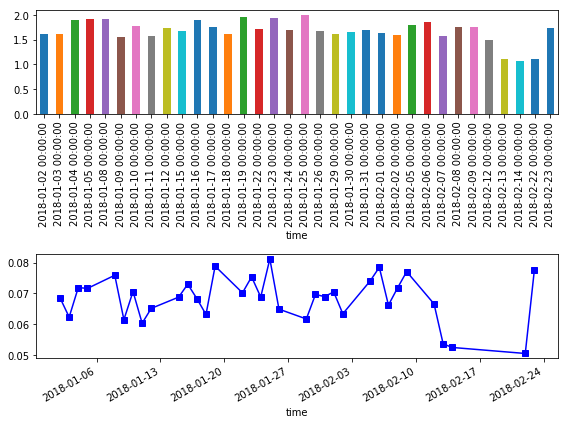

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1,)
fig.set_figheight(6)
fig.set_figwidth(8)
join_df.sum_market.plot(ax=axes[0], style='r', label='Series', kind='bar')
# axes[0].set_title(0)
# join_df.sum_corpor.plot(ax=axes[1], ).bar();
join_df.sum_corpor.plot(ax=axes[1], style='bs-')
styles=['bs-', 'ro-', 'y^-']
# axes[1].set_title(1)

fig.tight_layout()

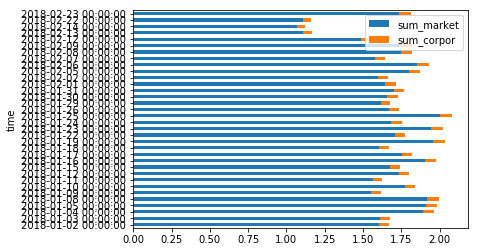

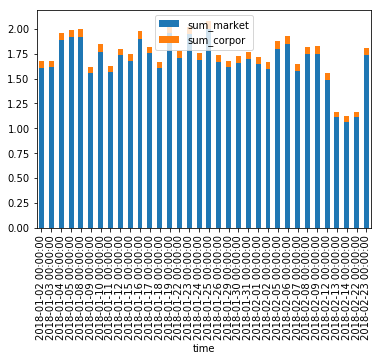

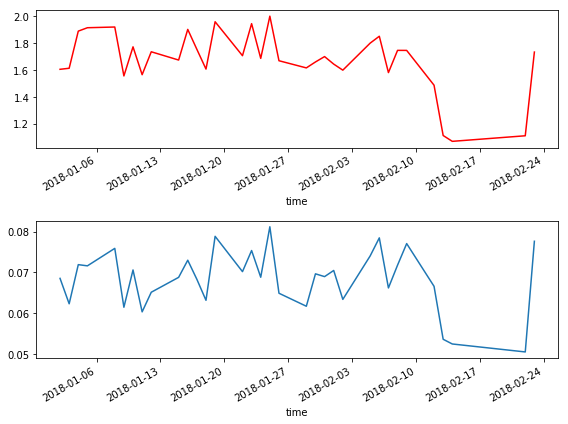

In [21]:
import matplotlib.pyplot as plt
join_df.plot.barh(stacked=True);
join_df.plot.bar(stacked=True);

fig, axes = plt.subplots(nrows=2, ncols=1,)
fig.set_figheight(6)
fig.set_figwidth(8)
join_df.sum_market.plot(ax=axes[0], style='r', label='Series')
# axes[0].set_title(0)
# join_df.sum_corpor.plot(ax=axes[1], ).bar();
join_df.sum_corpor.plot(ax=axes[1], )
# axes[1].set_title(1)

fig.tight_layout()


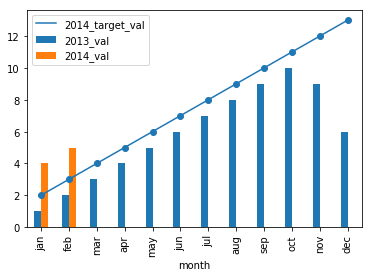

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

left_2013 = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2013_val': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 6]})

right_2014 = pd.DataFrame({'month': ['jan', 'feb'], '2014_val': [4, 5]})

right_2014_target = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2014_target_val': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

df_13_14 = pd.merge(left_2013, right_2014, how='outer')
df_13_14_target = pd.merge(df_13_14, right_2014_target, how='outer')

ax = df_13_14_target[['month', '2014_target_val']].plot(
    x='month', linestyle='-', marker='o')
df_13_14_target[['month', '2013_val', '2014_val']].plot(x='month', kind='bar',
                                                        ax=ax)

plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure()
# ax1 = join_df.sum_market.plot(figsize=(10, 5))
# ax2 =join_df.sum_corpor.plot(secondary_y=True, style='g',figsize=(10, 5))
# ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
# ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
# join_df.sum_corpor.plot(ax=ax1, kind='bar')
# join_df = join_df.reset_index()
# print(join_df)
ax = join_df[['time', 'sum_corpor']].plot(
    x='time', linestyle='-', marker='o')
join_df[['time', 'sum_market', 'sum_corpor']].plot(x='time', kind='bar',
                                                       )
plt.show()

KeyError: "['time'] not in index"

In [26]:
import matplotlib.pyplot as plt
plt.figure()
ax1 = join_df[['time', 'sum_market']].sum_market.plot(figsize=(10, 5))
ax2 = join_df[['time', 'sum_corpor']].plot(secondary_y=True, style='g',figsize=(10, 5))
ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

join_df[['time', 'sum_market', 'sum_corpor']].plot(x='time', kind='bar',
                                                       )

KeyError: "['time'] not in index"

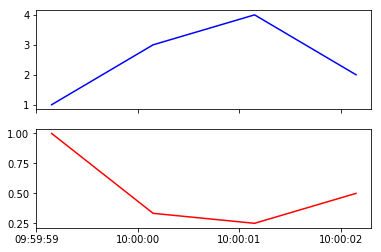

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

x = np.array([dt.datetime(2012, 10, 19, 10, 0, 0),
              dt.datetime(2012, 10, 19, 10, 0, 1),
              dt.datetime(2012, 10, 19, 10, 0, 2),
              dt.datetime(2012, 10, 19, 10, 0, 3)])

y = np.array([1, 3, 4, 2])

fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True)
ax1.plot(x, y, 'b-')
ax2.plot(x, 1.0/y, 'r-')
plt.show()

           trade_type_market  sum_market trade_type_corpor  sum_corpor
time                                                                  
2018-01-02                市场    1.604329                公司    0.068502
2018-01-03                市场    1.612098                公司    0.062260
2018-01-04                市场    1.888569                公司    0.071875
2018-01-05                市场    1.913882                公司    0.071580
2018-01-08                市场    1.919141                公司    0.075871
2018-01-09                市场    1.554985                公司    0.061412
2018-01-10                市场    1.771582                公司    0.070571
2018-01-11                市场    1.564146                公司    0.060280
2018-01-12                市场    1.734820                公司    0.065097
2018-01-15                市场    1.673279                公司    0.068753
2018-01-16                市场    1.901469                公司    0.072960
2018-01-17                市场    1.752963                公司    0.068270
2018-0

[Text(1,0,'0.10%'),
 Text(1,0,'1.00%'),
 Text(1,0,'10.00%'),
 Text(1,0,'100.00%'),
 Text(1,0,'1000.00%'),
 Text(1,0,'10000.00%')]

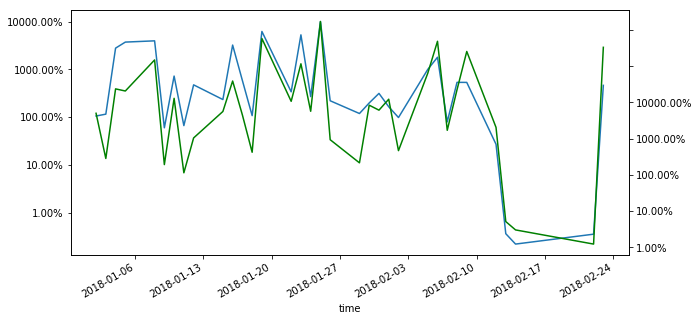

In [29]:
import matplotlib.pyplot as plt
plt.figure()
print(join_df)
ax1 = join_df.sum_market.plot(figsize=(10, 5))
ax2 =join_df.sum_corpor.plot(secondary_y=True, style='g',figsize=(10, 5))
ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

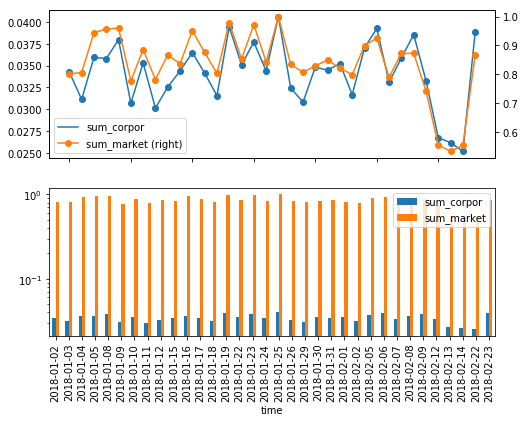

In [14]:
test_df = join_df.copy()
test_df = test_df.reset_index()
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=1,)
fig.set_figheight(6)
fig.set_figwidth(8)
test_df['time'] = test_df['time'].apply(lambda x: x.strftime('%Y-%m-%d'))
ax = test_df[['time', 'sum_corpor']].plot(
    x='time', linestyle='-', marker='o', ax=axes[0])
test_df[['time', 'sum_market']].plot(
    x='time', linestyle='-', marker='o', secondary_y=True,ax = axes[0])
test_df[['time', 'sum_corpor', 'sum_market']].plot(x='time', kind='bar'
                                                    
                                                   , logy = True
                                                   ,sharex=True
                                                   ,ax = axes[1])
# test_df[['time', 'sum_market']].plot(x='time', kind='bar',
#                                                     ax=ax, secondary_y=True,)
# ax = df_13_14_target[['month', '2014_target_val']].plot(
#     x='month', linestyle='-', marker='o')
# df_13_14_target[['month', '2013_val', '2014_val']].plot(x='month', kind='bar',
#                                                         ax=ax)

plt.show()
plt.show()

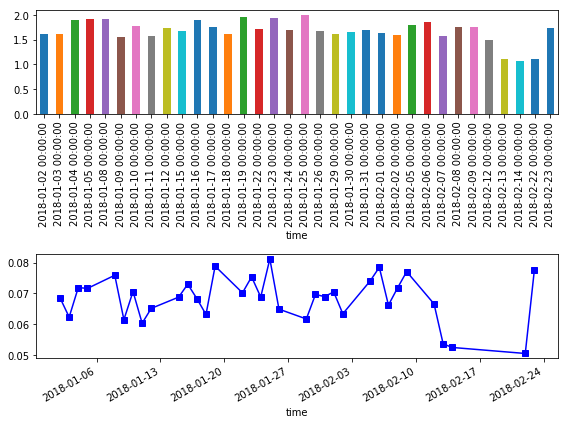

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1,)
fig.set_figheight(6)
fig.set_figwidth(8)
join_df.sum_market.plot(ax=axes[0], style='r', label='Series', kind='bar')
# axes[0].set_title(0)
# join_df.sum_corpor.plot(ax=axes[1], ).bar();
join_df.sum_corpor.plot(ax=axes[1], style='bs-')
styles=['bs-', 'ro-', 'y^-']
# axes[1].set_title(1)

fig.tight_layout()

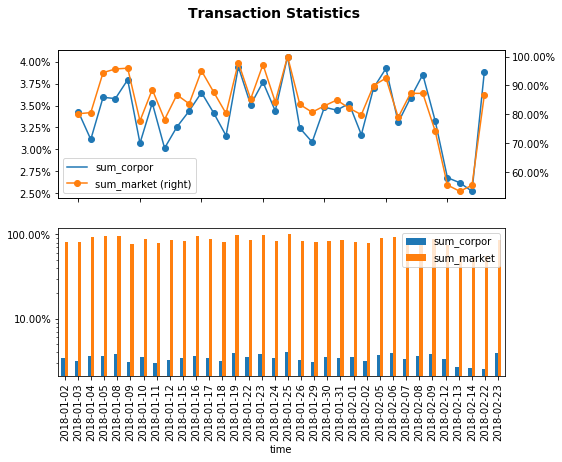

In [15]:
test_df = join_df.copy()
test_df = test_df.reset_index()
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=1,)
fig.set_figheight(6)
fig.set_figwidth(8)
test_df['time'] = test_df['time'].apply(lambda x: x.strftime('%Y-%m-%d'))
ax = test_df[['time', 'sum_corpor']].plot(
    x='time', linestyle='-', marker='o', ax=axes[0])
ax2 = test_df[['time', 'sum_market']].plot(
    x='time', linestyle='-', marker='o', secondary_y=True,ax = axes[0])
test_df[['time', 'sum_corpor', 'sum_market']].plot(x='time', kind='bar'
                                                    
                                                   , logy = True
                                                   ,sharex=True
                                                   ,ax = axes[1])

def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)
def percent(x, pos):
    'The two args are the value and tick position'
    # '%.2f%%' % (rate * 100)
    return '%.2f%%' % (x * 100)
formatter = FuncFormatter(percent)
axes[0].yaxis.set_major_formatter(formatter)
# ax2 = axes[0].twinx()
ax2.yaxis.set_major_formatter(formatter)
# secondary_y
axes[1].yaxis.set_major_formatter(formatter)

fig.suptitle('Transaction Statistics', fontsize=14, fontweight='bold');                                         
import io
from PIL import Image
import xlsxwriter

from io import BytesIO
import matplotlib.pyplot as plt
imgdata = BytesIO()

fig.savefig(imgdata, format="png")
imgdata.seek(0)
import io
from PIL import Image
import xlsxwriter

workbook = xlsxwriter.Workbook('期货持仓分析报告.xlsx')
worksheet = workbook.add_worksheet("全市场成交统计")

image_width = 140.0
image_height = 182.0

cell_width = 64.0
cell_height = 20.0

x_scale = cell_width/image_width * 10
y_scale = cell_height/image_height * 10
# x_scale = cell_width
# y_scale = cell_height
# 
# worksheet.insert_image('B2', 'sales.png',
#                        {'x_scale': x_scale, 'y_scale': y_scale})




# use with xlsxwriter
image_path = 'sales.png'
bound_width_height = (240, 240)


# sanity check: remove these three lines if they cause problems
# im = Image.open(image_data)
# im.show()  # test if it worked so far - it does for me
# im.seek(0)  # reset the "file" for excel to read it.              
# worksheet.insert_image('B5', 'python.png', {'image_data': image_data})
worksheet.insert_image('B5', image_path, {'image_data': imgdata,})
worksheet.insert_image('B40', image_path, {'image_data': imgdata,})
workbook.close()
plt.show()
plt.show()